# California Housing Prices [Kaggle Link](https://www.kaggle.com/datasets/camnugent/california-housing-prices)

In [1]:
# Get the dataset
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2023-10-17 09:47:02--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  1.78MB/s    in 0.8s    

2023-10-17 09:47:04 (1.78 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [2]:
import pandas as pd
def load_dataset(data_file: str = "housing.csv"):
    df = pd.read_csv(data_file)
    return df

In [67]:
df = load_dataset()

### Preparing the dataset 

For this homework, we only want to use a subset of data. This is the same subset we used in homework #2.

First, keep only the records where `ocean_proximity` is either `'<1H OCEAN'` or `'INLAND'`

Preparation:

* Apply the log tranform to `median_house_value`.
* Do train/validation/test split with 60%/20%/20% distribution. 
* Use the `train_test_split` function and set the `random_state` parameter to 1.
* Use `DictVectorizer(sparse=True)` to turn the dataframe into matrices.

In [68]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [69]:
df = df[(df['ocean_proximity'] == '<1H OCEAN') | (df['ocean_proximity'] == 'ISLAND')]

In [70]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN    9136
ISLAND          5
Name: count, dtype: int64

### Apply the log tranform to `median_house_value`.

In [71]:
import numpy as np
df.loc[:, 'median_house_value'] = np.log1p(df['median_house_value'])

### Do train/validation/test split with 60%/20%/20% distribution.

In [72]:
from sklearn.model_selection import train_test_split

def split_train_val_test_dataset(df):
    df.fillna(value=0, inplace=True)
    df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
    df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
    
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train = df_train['median_house_value'].values
    y_val = df_val['median_house_value'].values
    y_test = df_test['median_house_value'].values
    
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    return df_train, df_val, df_test, y_train, y_val, y_test
    
    

In [73]:
df_train, df_val, df_test, y_train, y_val, y_test = split_train_val_test_dataset(df)

### Use `DictVectorizer(sparse=True)` to turn the dataframe into matrices.

In [74]:
from sklearn.feature_extraction import DictVectorizer

def trun_train_dataframe_into_matrices(df):
    dv = DictVectorizer(sparse=False)
    df_dict = df.to_dict(orient='records')
    X = dv.fit_transform(df_dict)
    return dv, X

In [111]:
def trun_val_dataframe_into_matrices(df, dv):
    df_dict = df.to_dict(orient='records')
    X = dv.transform(df_dict)
    return X

In [112]:
def trun_dataframe_into_matrices(df_train, df_val):
    dv, X_train = trun_train_dataframe_into_matrices(df_train)
    X_val = trun_val_dataframe_into_matrices(df_val, dv)
    return X_train, X_val, dv

In [113]:
X_train, X_val, dv = trun_dataframe_into_matrices(df_train, df_val)

In [114]:
X_train[0]

array([ 5.0100e+02,  2.5000e+01,  3.3940e+01, -1.1794e+02,  5.1084e+00,
        1.0000e+00,  0.0000e+00,  1.4520e+03,  5.4600e+02,  3.2500e+03])

In [115]:
df_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-117.94,33.94,25.0,3250.0,546.0,1452.0,501.0,5.1084,<1H OCEAN
1,-118.29,33.98,42.0,2833.0,768.0,2542.0,725.0,1.3479,<1H OCEAN
2,-117.70,33.68,29.0,5650.0,1084.0,3985.0,1056.0,2.8192,<1H OCEAN
3,-118.48,34.20,23.0,2850.0,864.0,2249.0,777.0,2.6957,<1H OCEAN
4,-118.14,33.95,36.0,1942.0,355.0,891.0,348.0,3.6635,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
5479,-121.85,37.44,8.0,426.0,61.0,241.0,55.0,7.3090,<1H OCEAN
5480,-118.46,34.19,20.0,5992.0,1820.0,4826.0,1632.0,2.7237,<1H OCEAN
5481,-118.12,34.12,52.0,2907.0,317.0,956.0,279.0,15.0001,<1H OCEAN
5482,-117.67,33.61,23.0,3588.0,577.0,1695.0,569.0,6.1401,<1H OCEAN


## Question 1

Let's train a decision tree regressor to predict the `median_house_value` variable. 

* Train a model with `max_depth=1`.


Which feature is used for splitting the data?

* `ocean_proximity`
* `total_rooms`
* `latitude`
* `population`

In [116]:
from sklearn.tree import DecisionTreeRegressor, export_text

In [117]:
def train_decision_tree_regressor(X, y):
    dt = DecisionTreeRegressor(max_depth=1)
    dt.fit(X, y)
    return dt

In [118]:
dt = train_decision_tree_regressor(X_train, y_train)

In [119]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- median_income <= 4.88
|   |--- value: [12.14]
|--- median_income >  4.88
|   |--- value: [12.66]



In [120]:
list(dv.get_feature_names_out())

['households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity=<1H OCEAN',
 'ocean_proximity=ISLAND',
 'population',
 'total_bedrooms',
 'total_rooms']

> **Answer** `median_income`

## Question 2

Train a random forest model with these parameters:

* `n_estimators=10`
* `random_state=1`
* `n_jobs=-1` (optional - to make training faster)


What's the RMSE of this model on validation?

* 0.045
* 0.245
* 0.545
* 0.845

In [121]:
from sklearn.ensemble import RandomForestRegressor
def train_random_forest_regressor(X, y, **kargs):
    rfr = RandomForestRegressor(n_estimators = kargs['n_estimators'], 
                                random_state = kargs['random_state'], 
                                n_jobs = kargs['n_jobs'])
    rfr.fit(X, y)
    return rfr

In [122]:
rfr = train_random_forest_regressor(X_train, y_train, n_estimators=10, random_state=1, n_jobs=-1)

In [127]:
from sklearn.metrics import mean_squared_error

def rmse(y, y_pred):
    mse = mean_squared_error(y, y_pred)
    return np.sqrt(mse)

In [128]:
y_pred = rfr.predict(X_val)

In [129]:
rmse(y_val, y_pred)

0.2172514213932212

> **Answer** `0.2173`

## Question 3

Now let's experiment with the `n_estimators` parameter

* Try different values of this parameter from 10 to 200 with step 10.
* Set `random_state` to `1`.
* Evaluate the model on the validation dataset.


After which value of `n_estimators` does RMSE stop improving?

- 10
- 25
- 50
- 160

In [132]:
def random_forest_regressor_evaluation():
    scores = []
    for estimator in range(10, 201, 10):
        rfr = train_random_forest_regressor(X_train, y_train, 
                                            n_estimators=estimator, 
                                            random_state=1, 
                                            n_jobs=-1)
        y_pred = rfr.predict(X_val)
        rmse_value = rmse(y_val, y_pred)
        scores.append((estimator, rmse_value))
    return scores

In [133]:
scores = random_forest_regressor_evaluation()

In [134]:
scores

[(10, 0.2172514213932212),
 (20, 0.21134257841474496),
 (30, 0.20893072094084034),
 (40, 0.20680313107908047),
 (50, 0.20628770892676104),
 (60, 0.20694522556140263),
 (70, 0.20709890804013095),
 (80, 0.20724455738759226),
 (90, 0.20682189896577366),
 (100, 0.2067058198869269),
 (110, 0.20681273698365646),
 (120, 0.20678744209191818),
 (130, 0.20675260224004427),
 (140, 0.20669661698880973),
 (150, 0.20671186927059385),
 (160, 0.20699257538993743),
 (170, 0.20692248646081027),
 (180, 0.2069228193202345),
 (190, 0.2069756824128247),
 (200, 0.20686338809581675)]

In [135]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])

In [136]:
df_scores

,n_estimators,rmse
0,10,0.217251
1,20,0.211343
2,30,0.208931
3,40,0.206803
4,50,0.206288
5,60,0.206945
6,70,0.207099
7,80,0.207245
8,90,0.206822
9,100,0.206706


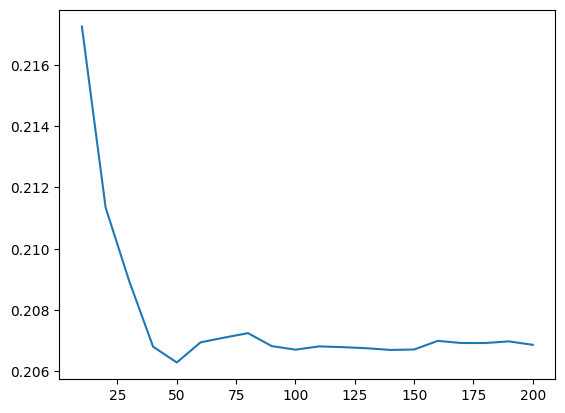

In [138]:
from matplotlib import pyplot as plt 
plt.plot(df_scores.n_estimators, df_scores.rmse)

> **Answer** `10`

## Question 4

Let's select the best `max_depth`:

* Try different values of `max_depth`: `[10, 15, 20, 25]`
* For each of these values, try different values of `n_estimators` from 10 till 200 (with step 10)
* Fix the random seed: `random_state=1`


What's the best `max_depth`:

* 10
* 15
* 20
* 25

In [168]:
def train_random_forest_regressor(X, y, **kwargs):
    n_estimators = kwargs.get('n_estimators', 100)  # Default value is 100 if not provided
    random_state = kwargs.get('random_state', None)  # Default value is None if not provided
    n_jobs = kwargs.get('n_jobs', 1)  # Default value is 1 if not provided
    max_depth = kwargs.get('max_depth', None)  # Default value is None if not provided


    rfr = RandomForestRegressor(n_estimators = n_estimators, 
                                random_state = random_state, 
                                n_jobs = n_jobs,
                                max_depth = max_depth)
    rfr.fit(X, y)
    return rfr

In [169]:
def random_forest_regressor_evaluation():
    scores = []
    for max_depth in [10, 15, 20, 25]:
        for estimator in range(10, 201, 10):
            rfr = train_random_forest_regressor(X_train, y_train, 
                                                n_estimators=estimator, 
                                                random_state=1, 
                                                n_jobs=-1,
                                                max_depth=max_depth)
            y_pred = rfr.predict(X_val)
            rmse_value = rmse(y_val, y_pred)
            scores.append((max_depth, estimator, rmse_value))
    return scores

In [170]:
scores = random_forest_regressor_evaluation()

In [171]:
columns = ['max_depth', 'estimator', 'acc']
df_scores = pd.DataFrame(scores, columns=columns)

In [172]:
df_scores_pivot = df_scores.pivot(index='estimator', columns=['max_depth'], values=['acc'])
df_scores_pivot

acc                              
max_depth        10        15        20        25
estimator                                        
10         0.220073  0.216367  0.217146  0.216053
20         0.217559  0.210807  0.211946  0.210773
30         0.215749  0.209320  0.209711  0.208775
40         0.214487  0.207718  0.208012  0.206861
50         0.213984  0.207275  0.207328  0.206336
60         0.214533  0.207424  0.207666  0.207071
70         0.214236  0.207467  0.207362  0.207209
80         0.214484  0.207711  0.207620  0.207333
90         0.214048  0.207082  0.207238  0.207040
100        0.213978  0.207007  0.207273  0.206897
110        0.213900  0.206984  0.207234  0.206930
120        0.213647  0.207088  0.207319  0.206969
130        0.213652  0.207339  0.207349  0.207055
140        0.213531  0.207163  0.207245  0.207096
150        0.213479  0.207190  0.207292  0.207090
160        0.213746  0.207438  0.207509  0.207336
170        0.213697  0.207402  0.207505  0.207219
180        0.213766  0.207516  0.207486  0.207216
190        0.213850  0.207578  0.207478  0.207307
200        0.213688  0.207560  0.207433  0.207204

<Axes: xlabel='None-max_depth', ylabel='estimator'>

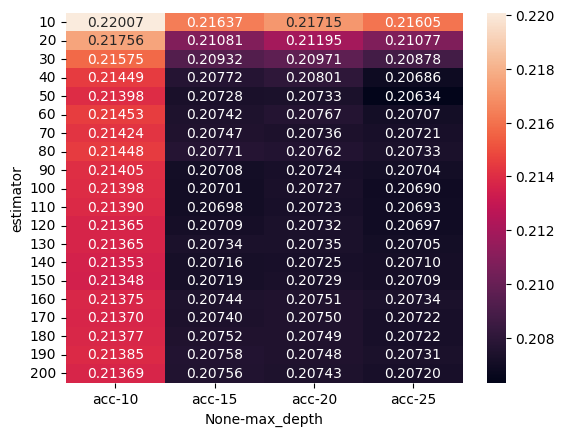

In [173]:
import seaborn as sns
sns.heatmap(df_scores_pivot, annot=True, fmt=".5f")

> **Answer** `max_depth = 10`

# Question 5

We can extract feature importance information from tree-based models. 

At each step of the decision tree learning algorith, it finds the best split. 
When doint it, we can calculate "gain" - the reduction in impurity before and after the split. 
This gain is quite useful in understanding what are the imporatant features 
for tree-based models.

In Scikit-Learn, tree-based models contain this information in the
[`feature_importances_`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.feature_importances_)
field. 

For this homework question, we'll find the most important feature:

* Train the model with these parametes:
    * `n_estimators=10`,
    * `max_depth=20`,
    * `random_state=1`,
    * `n_jobs=-1` (optional)
* Get the feature importance information from this model


What's the most important feature? 

* `total_rooms`
* `median_income`	
* `total_bedrooms`
* `longitude`

In [174]:
rfr = train_random_forest_regressor(X_train, y_train, 
                                    n_estimators=10, 
                                    random_state=1, 
                                    n_jobs=-1,
                                    max_depth=20)

In [178]:
feature_importance = rfr.feature_importances_

In [179]:
feature_list = list(dv.get_feature_names_out())

In [182]:
for feature, importance in zip(feature_list, feature_importance):
    print(f"{feature}: {importance}")

households: 0.023701865358874075
housing_median_age: 0.04765415621973393
latitude: 0.16700112957714555
longitude: 0.1506308091290344
median_income: 0.5113042127447004
ocean_proximity=<1H OCEAN: 0.0013705602622612616
ocean_proximity=ISLAND: 0.0009318721657234897
population: 0.03995623784837569
total_bedrooms: 0.023002178087113467
total_rooms: 0.03444697860703772


> **Answer** `median_income: 0.5113042127447004`

## Question 6

Now let's train an XGBoost model! For this question, we'll tune the `eta` parameter:

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:

```
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
```

Now change `eta` from `0.3` to `0.1`.

Which eta leads to the best RMSE score on the validation dataset?

* 0.3
* 0.1
* Both gives same

In [187]:
for eta in range (1, 4, 1):
    print(round(eta*0.1, 1))

0.1
0.2
0.3


### Install XGBoost

In [188]:
!pip install xgboost


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: pip install --upgrade pip


### Create DMatrix for train and validation

In [192]:
features = dv.get_feature_names_out()
features

array(['households', 'housing_median_age', 'latitude', 'longitude',
       'median_income', 'ocean_proximity=<1H OCEAN',
       'ocean_proximity=ISLAND', 'population', 'total_bedrooms',
       'total_rooms'], dtype=object)

In [194]:
features = ['households', 'housing_median_age', 'latitude', 'longitude',
       'median_income', 'ocean_proximity_1H_OCEAN',
       'ocean_proximity_ISLAND', 'population', 'total_bedrooms',
       'total_rooms']

In [195]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [198]:
for eta in range (1, 4, 1):
    eta_value = round(eta * 0.1, 1)
    xgb_params = {
        'eta': eta_value, 
        'max_depth': 6,
        'min_child_weight': 1,

        'objective': 'reg:squarederror',
        'nthread': 8,

        'seed': 1,
        'verbosity': 1,
    }

    model = xgb.train(xgb_params, dtrain, num_boost_round=100)
    y_pred = model.predict(dval)
    rmse_value = rmse(y_val, y_pred)
    print(f"eta: {eta_value}, rmse : {rmse_value}")

eta: 0.1, rmse : 0.21024975739580765
eta: 0.2, rmse : 0.2094816585709805
eta: 0.3, rmse : 0.20885107181942097


> **Answer** `eta: 0.1, rmse : 0.21024975739580765`